# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



### Importación de Pandas

In [1]:
import pandas as pd

### Exploración Inicial de los Datos

En esta sección, se realiza una exploración inicial del dataset para comprender su estructura y contenido. Se utilizan los siguientes métodos:
- head(): Para visualizar las primeras filas del DataFrame.
- info(): Para obtener información general sobre el DataFrame, como tipos de datos y valores no nulos.
- describe(): Para calcular estadísticas descriptivas de las columnas numéricas.
- isnull().sum(): Para identificar valores nulos en el dataset.

In [2]:
df = pd.read_csv("./datasets_calificaciones.csv")
print(df.head(5))
print("----------------------------------------------------------------------------")
print(df.info())


        estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
0        ana pérez  matematicas         8       7.5     9        95%
1     carlos lópez       fisica       6.2         7   NaN        88%
2      maría gómez      quimica         9       8.8   9.5       100%
3  pedro rodríguez     historia       7.5         6     7         75
4     laura vargas  matematicas                 9.2   8.5        92%
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None


In [3]:
print(df.describe())
print("----------------------------------------------------------------------------")
print(df.isnull().sum())


        estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
count          100          100        95        90    89        100
unique          96            7        49        45    46         35
top     mateo díaz  matematicas                 7.5   9.5        99%
freq             2           25         7         5     4          5
----------------------------------------------------------------------------
estudiante     0
Materia        0
Parcial 1      5
Parcial 2     10
Final         11
Asistencia     0
dtype: int64


# Limpieza y Preparación del Dataset

Se realiza una serie de transformaciones sobre un DataFrame  con datos de estudiantes y sus calificaciones. Para limpiar, normalizar y completar los datos faltantes para facilitar su análisis posterior.

## Copia del DataFrame

```python
df_copia = df.copy()


In [4]:
df_copia = df.copy()

df_copia['estudiante'] = df_copia['estudiante'].str.title()  
df_copia['Materia'] = df_copia['Materia'].str.title() 

df_copia['Final'] = pd.to_numeric(df['Final'], errors='coerce')
df_copia['Parcial 1'] = pd.to_numeric(df['Parcial 1'], errors='coerce')
df_copia['Parcial 2'] = pd.to_numeric(df['Parcial 2'], errors='coerce')

df_copia.rename(columns={"estudiante": "Estudiante"})

df_copia["Final"] = df_copia["Final"].fillna(df_copia['Final'].mean()).round(2)
df_copia["Parcial 1"] = df_copia["Parcial 1"].fillna(df_copia['Parcial 1'].mean()).round(2)
df_copia["Parcial 2"] = df_copia["Parcial 2"].fillna(df_copia['Parcial 2'].mean()).round(2)



In [5]:
df_copia["Asistencia"] = df_copia["Asistencia"].str.replace("%","").astype(int)
df_copia["Asistencia"] = df_copia["Asistencia"].clip(100,upper = True).astype(str) + "%"
df_copia

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.00,7.50,9.00,95%
1,Carlos López,Fisica,6.20,7.00,7.89,88%
2,María Gómez,Quimica,9.00,8.80,9.50,100%
3,Pedro Rodríguez,Historia,7.50,6.00,7.00,75%
4,Laura Vargas,Matematicas,7.83,9.20,8.50,92%
...,...,...,...,...,...,...
95,Josefina Torres,Historia,7.40,6.80,7.20,81%
96,Bautista Vargas,Matematicas,8.70,7.83,8.50,92%
97,Emma Soto,Fisica,6.60,7.00,6.40,83%
98,Mateo Díaz,Quimica,9.50,9.70,7.89,98%


In [6]:
Matematica = df_copia[df_copia["Materia"] == "Matematicas"]
Matematica.describe()

,Parcial 1,Parcial 2,Final
count,25.000000,25.000000,25.000000
mean,8.087200,8.261600,8.470400
std,0.655849,0.550391,0.640849
min,6.900000,7.300000,7.100000
25%,7.830000,7.830000,7.890000
50%,8.000000,8.100000,8.500000
75%,8.500000,8.700000,8.900000
max,9.500000,9.300000,9.600000


In [7]:
promedio_final_por_materia = df_copia.groupby("Materia")["Final"].mean()
promedio_final_por_materia

Materia
Ciencias Sociales       7.890000
Fisica                  6.624583
Historia                7.481667
Literatura Universal    8.200000
Matematicas             8.470400
Programacion Basica     6.300000
Quimica                 9.027083
Name: Final, dtype: float64

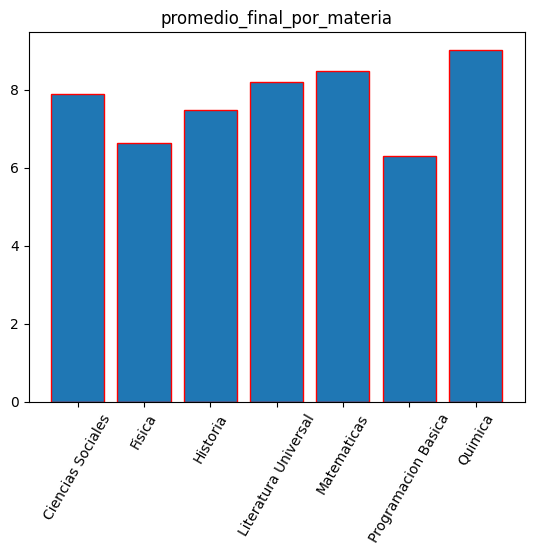

In [8]:
import matplotlib.pyplot as plt
plt.bar(promedio_final_por_materia.index,promedio_final_por_materia.values,edgecolor="red")
plt.title("promedio_final_por_materia")
plt.xticks(rotation=60)
plt.show()


In [9]:
promedio_de_asistencia = df_copia.copy()
promedio_de_asistencia["Asistencia"] = promedio_de_asistencia["Asistencia"].str.replace("%","").astype(int)
promedio_de_asistencia

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.00,7.50,9.00,95
1,Carlos López,Fisica,6.20,7.00,7.89,88
2,María Gómez,Quimica,9.00,8.80,9.50,100
3,Pedro Rodríguez,Historia,7.50,6.00,7.00,75
4,Laura Vargas,Matematicas,7.83,9.20,8.50,92
...,...,...,...,...,...,...
95,Josefina Torres,Historia,7.40,6.80,7.20,81
96,Bautista Vargas,Matematicas,8.70,7.83,8.50,92
97,Emma Soto,Fisica,6.60,7.00,6.40,83
98,Mateo Díaz,Quimica,9.50,9.70,7.89,98


In [10]:
promedio_de_asistencia_materia = promedio_de_asistencia.groupby("Materia")["Asistencia"].mean()
promedio_de_asistencia_materia

Materia
Ciencias Sociales       98.000000
Fisica                  82.208333
Historia                80.083333
Literatura Universal    85.000000
Matematicas             92.680000
Programacion Basica     82.000000
Quimica                 97.541667
Name: Asistencia, dtype: float64

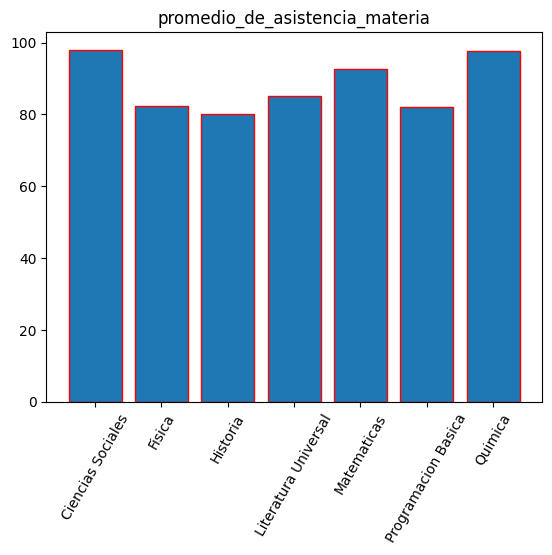

In [11]:
plt.bar(promedio_de_asistencia_materia.index,promedio_de_asistencia_materia.values,edgecolor="red")
plt.title("promedio_de_asistencia_materia")
plt.xticks(rotation=60)
plt.show()

In [12]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///notas.sqlite")

df_copia.to_sql("notas", con=engine, index=False, if_exists="replace")

100